#### Description/Aim:

The Aim of this Project is to build a DIY Frontend for an ML Model.  <br /> We are building a predictor to know if someone today would have survived on the Titanic or not.  <br />And also reveal the percentage survival probability.

In [65]:
#import libraries
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from functions import make_piechart
import seaborn as sns

In [66]:
#read in dataset

df = pd.read_csv('./data/data.csv')

df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


#### Descriptives

In [67]:
### Data Exploration and Descriptives

df.Gender.value_counts()

Boy     663
Girl    542
Name: Gender, dtype: int64

In [68]:
#check for null values
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [69]:
print('The data contains {} data pints and {} features.'.format(df.shape[0],df.shape[1]))

The data contains 1205 data pints and 14 features.


In [70]:
df.Age.value_counts()

21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64

In [71]:
df['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

In [72]:
df['Class Duration'].value_counts()

1-3    840
3-6    211
0      154
Name: Class Duration, dtype: int64

In [73]:
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [74]:
#rename 0 with less than 1
df['Class Duration'] = df['Class Duration'].replace('0','less than 1')

#drop all data of Ages 1 to 5
df = df[df['Age'] != '1-5']

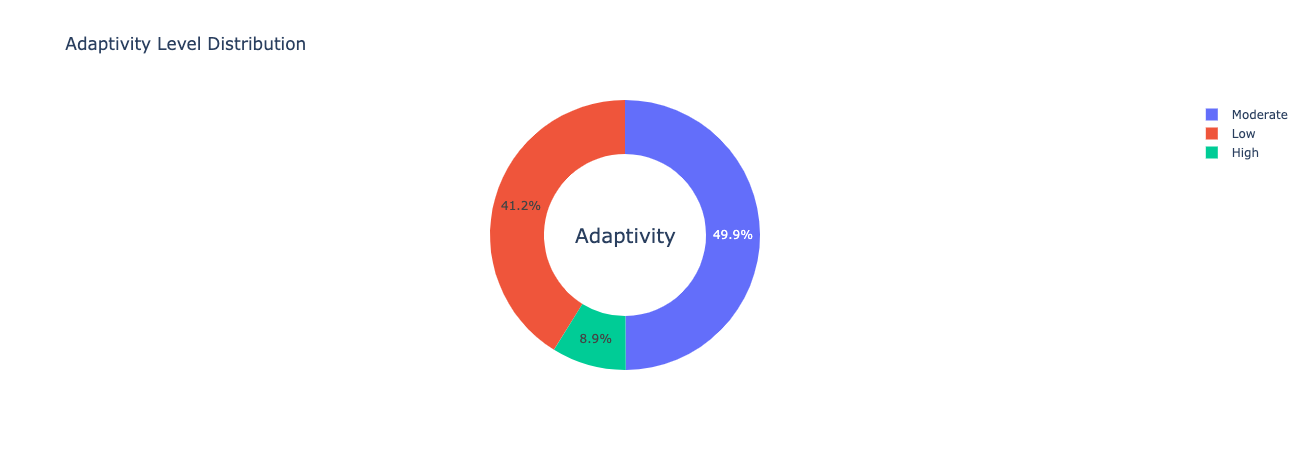

In [75]:
make_piechart(df = df,column='Adaptivity Level',title="Adaptivity Level Distribution",
              mid_text='Adaptivity')

link to descriptives on Google Data Studio

#### Model Development

In [76]:
#drop Load-shedding
df = df.drop(['Location','Load-shedding','Self Lms'],axis=1)

In [ ]:
#label encoding

le_cols = ['Gender','Institution Type','IT Student','Financial Condition','Internet Type']
le = ce.OrdinalEncoder(cols=le_cols)


#base encode the Age category
base_cols = ['Age']
base_enc = ce.BaseNEncoder(cols=base_cols,base=3)


#others
cols = ['Education Level','Financial Condition','Network Type','Class Duration','Device']


In [77]:
#encoding
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Financial Condition,Internet Type,Network Type,Class Duration,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Mid,Wifi,4G,3-6,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Mid,Mobile Data,4G,1-3,Mobile,Moderate
2,Girl,16-20,College,Government,No,Mid,Wifi,4G,1-3,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Mid,Mobile Data,4G,1-3,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Poor,Mobile Data,3G,less than 1,Mobile,Low


In [57]:
#### Logistic Regression